<a href="https://colab.research.google.com/github/FeraMaks/test/blob/main/NN_ShaftTraectory_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
from numpy.core.memmap import uint8

from google.colab import drive

In [2]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##Загрузка данных

Эллиптические графики

In [4]:
# Советую воспользоваться циклом for, чтобы не писать множество однотипных строк кода

data1 = pd.read_excel(open('/content/drive/MyDrive/work/100_000.xlsx', 'rb'))
data1 = pd.DataFrame(data1)
data1 = pd.DataFrame.to_numpy(data1)
data1 = np.rot90(data1)
data1.shape

(6, 20000)

In [5]:
data2 = pd.read_excel(open('/content/drive/MyDrive/work/110_000.xlsx', 'rb'))
data2 = pd.DataFrame(data2)
data2 = pd.DataFrame.to_numpy(data2)
data2 = np.rot90(data2)
data2.shape

(6, 20000)

In [6]:
data3 = pd.read_excel(open('/content/drive/MyDrive/work/120_000.xlsx', 'rb'))
data3 = pd.DataFrame(data3)
data3 = pd.DataFrame.to_numpy(data3)
data3 = np.rot90(data3)
data3.shape

(6, 20000)

In [7]:
data4 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1801_062-480_000.xlsx', 'rb'))
data4 = pd.DataFrame(data4)
data4 = pd.DataFrame.to_numpy(data4)
data4 = np.rot90(data4)
data4.shape

(6, 20000)

In [8]:
data5 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1748_027-360_000.xlsx', 'rb'))
data5 = pd.DataFrame(data5)
data5 = pd.DataFrame.to_numpy(data5)
data5 = np.rot90(data5)
data5.shape

(6, 20000)

In [9]:
data6 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1746_022-340_000.xlsx', 'rb'))
data6 = pd.DataFrame(data6)
data6 = pd.DataFrame.to_numpy(data6)
data6 = np.rot90(data6)
data6.shape

(6, 20000)

In [10]:
data7 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1746_021_000.xlsx', 'rb'))
data7 = pd.DataFrame(data7)
data7 = pd.DataFrame.to_numpy(data7)
data7 = np.rot90(data7)
data7.shape

(6, 20000)

In [11]:
data8 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1744_017-330_000.xlsx', 'rb'))
data8 = pd.DataFrame(data8)
data8 = pd.DataFrame.to_numpy(data8)
data8 = np.rot90(data8)
data8.shape

(6, 20000)

Метастабильные графики

In [12]:
data11 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1739_005-290_222.xlsx', 'rb'))
data11 = pd.DataFrame(data11)
data11 = pd.DataFrame.to_numpy(data11)
data11 = np.rot90(data11)
data11.shape

(6, 20000)

In [13]:
data12 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1739_006_222.xlsx', 'rb'))
data12 = pd.DataFrame(data12)
data12 = pd.DataFrame.to_numpy(data12)
data12 = np.rot90(data12)
data12.shape

(6, 20000)

In [14]:
data13 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1740_007_222.xlsx', 'rb'))
data13 = pd.DataFrame(data13)
data13 = pd.DataFrame.to_numpy(data13)
data13 = np.rot90(data13)
data13.shape

(6, 20000)

In [15]:
data14 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1740_009_222.xlsx', 'rb'))
data14 = pd.DataFrame(data14)
data14 = pd.DataFrame.to_numpy(data14)
data14 = np.rot90(data14)
data14.shape

(6, 20000)

In [16]:
data15 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1737_016_222.xlsx', 'rb'))
data15 = pd.DataFrame(data15)
data15 = pd.DataFrame.to_numpy(data15)
data15 = np.rot90(data15)
data15.shape

(6, 20000)

In [17]:
data16 = pd.read_excel(open('/content/drive/MyDrive/work/260_222.xlsx', 'rb'))
data16 = pd.DataFrame(data16)
data16 = pd.DataFrame.to_numpy(data16)
data16 = np.rot90(data16)
data16.shape

(6, 20000)

In [18]:
data17 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1625_002-10_222.xlsx', 'rb'))
data17 = pd.DataFrame(data17)
data17 = pd.DataFrame.to_numpy(data17)
data17 = np.rot90(data17)
data17.shape

(6, 20000)

In [19]:
data18 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1625_003_222.xlsx', 'rb'))
data18 = pd.DataFrame(data18)
data18 = pd.DataFrame.to_numpy(data18)
data18 = np.rot90(data18)
data18.shape

(6, 20000)

Графики на валидацию

In [20]:
data9 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1704_020_000.xlsx', 'rb'))
data9 = pd.DataFrame(data9)
data9 = pd.DataFrame.to_numpy(data9)
data9 = np.rot90(data9)
data9.shape

(6, 20000)

In [21]:
data10 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1704_021_000.xlsx', 'rb'))
data10 = pd.DataFrame(data10)
data10 = pd.DataFrame.to_numpy(data10)
data10 = np.rot90(data10)
data10.shape

(6, 20000)

In [22]:
data19 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1741_010_222.xlsx', 'rb'))
data19 = pd.DataFrame(data19)
data19 = pd.DataFrame.to_numpy(data19)
data19 = np.rot90(data19)
data19.shape

(6, 20000)

In [23]:
data20 = pd.read_excel(open('/content/drive/MyDrive/work/001_19-12-05_1625_001_222.xlsx', 'rb'))
data20 = pd.DataFrame(data20)
data20 = pd.DataFrame.to_numpy(data20)
data20 = np.rot90(data20)
data20.shape

(6, 20000)

##Подготовка датасета

In [24]:
#parameters
data_train_number = 16 # количество файлов с графиками на обучение
data_test_number = 4 # количество файлов с графиками на валидацию
num_samples = 10 # количество сэмплов в одном графике
point_number = 2000 # количество точек в одном графике
num_graphycs = 3 # количество графиков
num_grahp0 = 3 # кол-во эллиптических графиков
num_grahp2 = 3 # кол-во метастабильных графиков
inputs = []
inputs_test = []

Data for training

In [25]:
y0_train = np.zeros((num_grahp0*num_samples*8,1))
y2_train = np.ones((num_grahp2*num_samples*8,1))
y_train = np.concatenate((y0_train, y2_train))
#for i in range (5):
#  y = np.concatenate((y, y))
y_train, y_train.shape

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [26]:
data_x_train = np.concatenate((data1,data2,data3,data4,data5,data6,data7,data8,data11,data12,data13,data14,data15,data16,data17,data18))
data_x_train.shape

(96, 20000)

In [27]:
for j in range (data_train_number*num_graphycs):
  for i in range (num_samples):
    inputs.append(np.concatenate((data_x_train[j*2,i*point_number:i*point_number+point_number], data_x_train[j*2+1,i*point_number:i*point_number+point_number])))
inputs = np.concatenate(inputs, axis=0)
x_train = np.reshape(inputs, (data_train_number*num_graphycs*num_samples,point_number*2))
# Тип данных  в нейросетях - float32. Можно и float64, но тогда модель нужно делать с таким типом данных.
#x = x.astype('float32')
x_train.shape

(480, 4000)

In [28]:
data_train = np.concatenate((y_train,x_train), axis=1)
data_train[0,:]

array([   0.      , -182.154261, -182.813766, ...,  -46.86475 ,
        -44.582413,  -42.288928])

In [29]:
data_train = sorted(data_train, key=lambda x: random.random())

In [30]:
data_train = np.asarray(data_train)
data_train.shape

(480, 4001)

In [31]:
x_train, y_train = data_train[:,1:], data_train[:,0]
x_train = x_train.astype('float32')
y_train = y_train.astype('int64')
x_train.shape, y_train.shape

((480, 4000), (480,))

Data for validation

In [32]:
y0_test = np.zeros((num_grahp0*num_samples*2,1))
y2_test = np.ones((num_grahp2*num_samples*2,1))
y_test = np.concatenate((y0_test, y2_test))
#for i in range (5):
#  y = np.concatenate((y, y))
y_test, y_test.shape

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [33]:
data_x_test = np.concatenate((data9,data10,data19,data20))
data_x_test.shape

(24, 20000)

In [34]:
for j in range (data_test_number*num_graphycs):
  for i in range (num_samples):
    inputs_test.append(np.concatenate((data_x_test[j*2,i*point_number:i*point_number+point_number], data_x_test[j*2+1,i*point_number:i*point_number+point_number])))
inputs_test = np.concatenate(inputs_test, axis=0)
x_test = np.reshape(inputs_test, (data_test_number*num_graphycs*num_samples,point_number*2))
# Тип данных  в нейросетях - float32. Можно и float64, но тогда модель нужно делать с таким типом данных.
#x = x.astype('float32')
x_test.shape

(120, 4000)

In [35]:
data_test = np.concatenate((y_test,x_test), axis=1)
data_test[0,:]

array([  0.      , -23.212506, -23.374555, ..., -11.030063, -11.037047,
       -11.049435])

In [36]:
data_test = sorted(data_test, key=lambda x: random.random())

In [37]:
data_test = np.asarray(data_test)
data_test.shape

(120, 4001)

In [38]:
x_test, y_test = data_test[:,1:], data_test[:,0]
x_test = x_test.astype('float32')
y_test = y_test.astype('int64')
x_test.shape, y_test.shape

((120, 4000), (120,))

In [39]:
# Индексация классов начиается с нуля. То есть первый класс - 0, второй класс - 1. Тип данных разметки - int64.
# Размерность у разметки должна быть одна

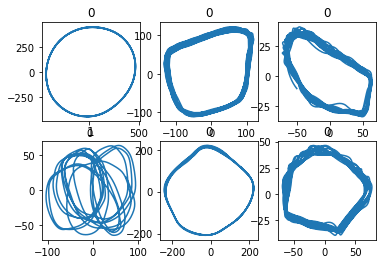

In [40]:
for i in range (6):
  plt.subplot(2, 3, i+1)
  plt.title(y_train[i])
  plt.plot(x_train[i,:1999], x_train[i,2001:4000], color='tab:blue')
plt.show()

In [41]:
# Тут и далее уже очень много ошибок, покажу просто как правильно с комментариями.

class ShaftDataset(Dataset):
    def __init__(self, x, y, mode):
        # Проверка выборки
        if mode == 'train':
            self.x = x_train
            self.y = y_train
        elif mode == 'val':
            self.x = x_test
            self.y = y_test
            
        # Разбиение сделано по вашему примеру, но обращаю внимание,
        # что так в тренировочной выборке всего один пример со 2 классом. А в тестовой - только 2 класс/
        # Поэтому нужно как то примеры скомпоновать по-другому

    def __getitem__(self, index):
        return self.x[index], self.y[index]
  
    def __len__(self):
        return len(self.y)

In [42]:
# Создаем два отдельных датасета и их будем подавать в Loader.
# Изначально вы пытались сделать два среза по одному датасету и подавили в Loader. Так работать не будет

train_dataset = ShaftDataset(x_train, y_train, 'train')
test_dataset = ShaftDataset(x_test, y_test, 'val')


In [43]:
train_dataset[0]

(array([-112.70328, -118.97538, -125.19293, ..., -444.55695, -444.7074 ,
        -444.7515 ], dtype=float32), 0)

Hyper parameters

In [44]:
input_size = x_train.shape[1]
hidden_size = 40 # Попробуйте для начала поменьше
num_classes = 2
num_epochs = 1000
batch_size = 15 # Bath size не может быть больше размера датасета (у вас 30 примеров)
lr = 0.001 # learning rate

In [45]:
# Loader генерирует тензоры следующего размера -
# (batch_size (размер батча - кол-во примеров в батче), m (кол-во признаков))
# Таким образом, размерностей 2, а не 4

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [46]:
# Размеры данных в датасетах

features, labels = train_dataset.x, train_dataset.y
print(features.shape, labels.shape)
features, labels = test_dataset.x, test_dataset.y
print(features.shape, labels.shape)
#samples = torch.from_numpy(samples)
#labels = torch.from_numpy(labels)

(480, 4000) (480,)
(120, 4000) (120,)


#Создание нейронной сети

In [47]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out


In [48]:
model = NeuralNet(input_size, hidden_size, num_classes)

# Модель также перемещаем в нужное место
model = model.to(device)

Loss and optimizer

In [49]:
L = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

#Training loop

In [50]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (features, labels) in enumerate(train_loader):
    features = features.to(device)
    labels = labels.to(device)

    #forward path
    outputs = model(features) # Подаем признаки на вход нейросети
    loss = L(outputs, labels)

    #backward path
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 16 == 0:
       print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1 / 1000, step 16/32, loss = 23.6987
epoch 1 / 1000, step 32/32, loss = 1006.9693
epoch 2 / 1000, step 16/32, loss = 148.2214
epoch 2 / 1000, step 32/32, loss = 14.2884
epoch 3 / 1000, step 16/32, loss = 1.2262
epoch 3 / 1000, step 32/32, loss = 0.0326
epoch 4 / 1000, step 16/32, loss = 0.0009
epoch 4 / 1000, step 32/32, loss = 0.0001
epoch 5 / 1000, step 16/32, loss = 0.0000
epoch 5 / 1000, step 32/32, loss = 0.0000
epoch 6 / 1000, step 16/32, loss = 0.0051
epoch 6 / 1000, step 32/32, loss = 0.0062
epoch 7 / 1000, step 16/32, loss = 0.0003
epoch 7 / 1000, step 32/32, loss = 0.0005
epoch 8 / 1000, step 16/32, loss = 0.0000
epoch 8 / 1000, step 32/32, loss = 0.0010
epoch 9 / 1000, step 16/32, loss = 0.0000
epoch 9 / 1000, step 32/32, loss = 0.0006
epoch 10 / 1000, step 16/32, loss = 0.0000
epoch 10 / 1000, step 32/32, loss = 0.0000
epoch 11 / 1000, step 16/32, loss = 0.0032
epoch 11 / 1000, step 32/32, loss = 0.0008
epoch 12 / 1000, step 16/32, loss = 0.0007
epoch 12 / 1000, step 

In [51]:
outputs, labels

(tensor([[  66.4848,  -48.3615],
         [ -86.7523,   22.5836],
         [-133.6693,  167.1669],
         [  17.9889,  -60.8367],
         [ -44.3609,   44.8462],
         [  74.7398,  -88.8744],
         [  44.2668,  -47.4995],
         [  23.3895,  -63.8984],
         [ -35.8909,    9.6342],
         [  50.7480,  -83.3501],
         [-166.7719,   73.6138],
         [-124.9714,  156.3240],
         [ -21.9919,   10.4531],
         [-145.5263,   69.8843],
         [-105.1057,   54.4261]], grad_fn=<AddmmBackward0>),
 tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]))

#Test

In [52]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for features, labels in test_loader:
    features = features.to(device)
    labels = labels.to(device)
    outputs = model(features)
    print(outputs)
    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

tensor([[   0.4765,  -56.4853],
        [ -45.6451,   47.2203],
        [ -62.3465,   23.1881],
        [ -10.5206,   -4.7970],
        [  10.6235, -126.4294],
        [ -47.4884,   -5.9424],
        [ -32.0152,  -12.6253],
        [ -29.9515,   -9.9379],
        [ 237.1567,  -24.9058],
        [ -14.4886,   -1.7413],
        [  13.7794,  -74.7164],
        [  17.2839,   59.8425],
        [  -9.5281,   -1.1098],
        [  26.3834, -181.3379],
        [   3.1638,  -74.5320]])
tensor([[ 2.3433e+02, -4.6167e+01],
        [-5.0527e+01, -8.8623e+01],
        [ 5.6143e+02, -7.6187e+02],
        [-2.8686e+01,  5.9756e+00],
        [ 1.6187e+02, -1.9557e+02],
        [ 7.7165e+00, -6.0742e+00],
        [-4.4816e+01, -5.5592e+00],
        [-3.7853e+01,  2.8136e+01],
        [ 1.1109e+01, -5.3658e+01],
        [-2.3161e+01, -1.2655e+00],
        [ 5.5158e+02, -7.2749e+02],
        [ 2.9580e+02, -4.0807e+02],
        [ 7.9266e+00, -2.9647e-01],
        [ 2.2938e+02, -3.0806e+02],
        [ 1.809

In [53]:
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc} %')

accuracy = 80.0 %
